# Working Environment

We import all the packages you should need below. However, feel free to import extra packages. If you need to install some of these packages (ex: **rasterio**), you can access your shell and install like this: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

In [1]:
# All the imports are here
import warnings
from os import listdir
from os.path import isfile, join

import numpy as np
import rasterio

from matplotlib import pyplot as plt
%matplotlib inline 

# Data Manipulation Challenge description & instructions

In this challenge, you will have to load and manipulate satellite images, a typical daily task at Kayrros. Data manipulation is one of the core skills one should master, even before thinking about fancy algorithms and data pipelines. 

You will not be required to have any specific knowledge on imagery, as we will provide you with the necessary guidelines.

Please keep your code clean and don't forget to comment your code. You are also encouraged to provide as much detail as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. We will evaluate the cleanliness of your code as much as your results.

Have fun!

# Data loading and data description

## Setup

In [2]:
# Define the path where the images are located
IMG_PATH = 'data/'

# The functions below will be useful to load tif images as arrays
def rio_open(p):
    """
    Open an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        rasterio dataset
    """
    with warnings.catch_warnings():  # noisy warning may occur here
        warnings.filterwarnings("ignore", category=UserWarning)
        return rasterio.open(p)

def rio_read(p):
    """
    Read an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        numpy array
    """
    with rio_open(p) as x:
        return x.read().transpose((1, 2, 0)).squeeze()

## Loading and visualizing your first random satellite image band

Each satellite image is composed of 13 bands, going from visible light to near infrared. 

You will find these bands in the `data/` folder, under the format [image\_date]\_[image\_number].tif

The usual RGB images you are used to see (a picture for instance) are made of bands B02 (Blue), B03 (Green) and B04 (Red)

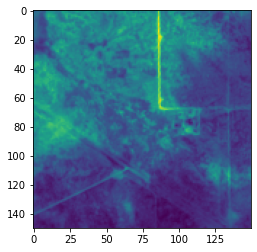

In [3]:
# Here, we show you how to load a given band from a random image and to visualize it
random_image_band = 'data/20170106_B02.tif'
img = rio_read(random_image_band)
plt.imshow(img)

## Loading the data set

In this section, you are expected to load the full data set in the following format: **dataset = {img\_date: {'B01': img\_B01_array, ..., 'B12': img\_B12_array}}**, where img\_B0X_array are the image bands as arrays, i.e. the output of the rio_read() function

In [ ]:
# Load the dataset under the required format
import os
IMG_PATH = 'data/'
dataset={}

ext='.tif'
tif_files=[i for i in os.listdir(IMG_PATH) if i.endswith(ext)] #we use the ext (extension) to make sure that we're only using the .tif files
for i in tif_files:
    img_date_key=i[0:8]
    image_Bs={}
    for j in tif_files:
        if j[0:8]==img_date_key:
            if (j[9:12]=='B01'):
                image_Bs['B01']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B02'):
                image_Bs['B02']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B03'):
                image_Bs['B03']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B04'):
                image_Bs['B04']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B05'):
                image_Bs['B05']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B06'):
                image_Bs['B06']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B07'):
                image_Bs['B07']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B08'):
                image_Bs['B08']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B8A'):
                image_Bs['B8A']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B09'):
                image_Bs['B09']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B10'):
                image_Bs['B10']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B11'):
                image_Bs['B11']=rasterio.open(IMG_PATH+j).read(1)
            if (j[9:12]=='B12'):
                image_Bs['B12']=rasterio.open(IMG_PATH+j).read(1)
    dataset[img_date_key]=image_Bs
   



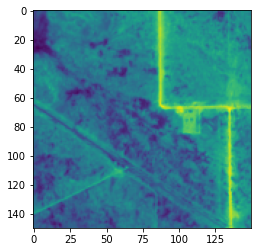

In [5]:
# Sanity check: visualize the 3rd band of the image from 2018/05/31
date='2018/05/31'
band='B03'
img_band_array=dataset[date.replace('/','')][band]
plt.imshow(img_band_array)


# Generating a RGB image 

Now we know how to visualize a given satellite image band, we are going to build a function that will allow us to visualize a given satellite image as an RGB image.

A RGB image can be represented as a 3D array, with the dimensions [channel, img_height, img_width] or [img_height, img_width, channel], with channels B02, B03 and B04.

In [99]:
# In order to test your function, you can use the following random image
# We want to display the image as an RGB composite, i.e. B04, B03, B02
img = np.array([dataset['20170630']['B04'], dataset['20170630']['B03'], dataset['20170630']['B02']])


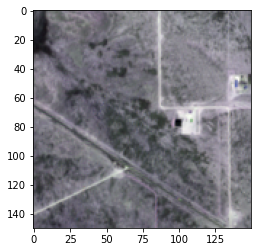

In [105]:
# Build your function that takes as input, a 3D array with B04, B03, B02 bands and returns the final rgb_img ready 
#to be visualized

# WRITE YOUR CODE HERE by completing the function below

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

def generate_rgb_img(img):
    
    # 1. First, you need to normalize your image. Otherwise you won't be able to visualize it.
    # Normalise your image here
    # Normalizing the 3 banbs
    nir_norm = normalize(img[0])
    red_norm = normalize(img[1])
    green_norm = normalize(img[2])

    # Stack bands to get a normalized image
    rgb_img = np.dstack(( red_norm, green_norm,nir_norm))
    
   
   
    return rgb_img

 # visualize the image using imshow
plt.imshow(generate_rgb_img(img))

# Detecting patterns in satellite imagery: flaring detection
In this section, we are going to detect some activity that might be difficult to observe in an RGB image by utilizing other satellite bands.

The activity we want to detect is called flaring: the process of burning gas in an open flame, which can be detected easily in the infrared spectrum picked up by the satellite.

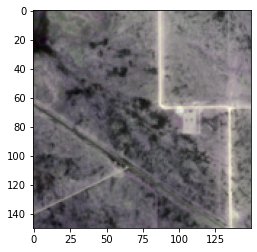

In [107]:
# Load and visualize the RGB image on 2018/05/31. Can you easily identify flaring ?
date_flaring='2018/05/31'
key_date_flaring=date.replace('/','') #get the correct format of the date 
img_flaring = np.array([dataset[key_date_flaring]['B04'], dataset[key_date_flaring]['B03'], dataset[key_date_flaring]['B02']])
plt.imshow(generate_rgb_img(img_flaring))

In [108]:
#Since the whole image is in black/white, we cannot easily detect flaring.

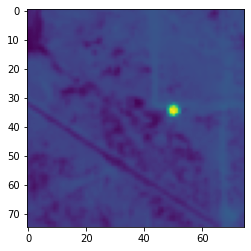

In [109]:
# generate a heatmap by adding B11 and B12, that is to say: heatmap = B11 + B12

B11=dataset[key_date_flaring]['B11']
B12=dataset[key_date_flaring]['B12']
heatmap=B11+B12
#visualize the heatmap
plt.imshow(heatmap)
#we can see a clear signal on the center-right of the image

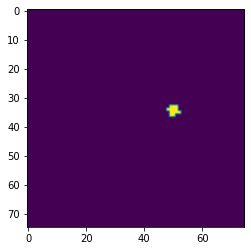

In [110]:
# To help us automate the detection process, it is easier to produce a mask of the flaring activity
# We can consider that there is flaring activity on a pixel if the value of the pixel is above 15.000
# Generate a mask of the flaring activity in the previous heatmap (mask: pixel=1 where there is flaring, pixel=0 where there is no flaring)
# Visualize the resulting mask

def generate_mask(heatmap):
    #we initialize all the mask by 0
    mask=np.zeros((75, 75)) 
    
    #we look for the pixels that are above 15.000 to change the corresponding values in the mask from 0 to 1
    for i in range(0, len(heatmap)):
        for j in range(0, len(heatmap[i])):
            if(heatmap[i][j]>15000):
                mask[i][j]=1           
    return mask
mask=generate_mask(heatmap)
#we visualize the map
plt.imshow(mask)
            


In [ ]:
# We consider an image to have flaring activity if the number of pixels above 15.000 in an image is >= 5.
# Write below a function that returns all the dates for which we should detect flaring activity in the data we provided

def flaring_activity_dates(dataset):
    #put all the dates of the dataset in an array called keys
    keys=np.array([])
    for key in dataset:
        keys=np.append(keys,[key],0)
 
    #put all the bands of the dataset in an array called bands
    bands=np.array([])
    for band in dataset[keys[0]]:
        bands= np.append(bands,[band],0)
  
    dates=np.array([])
    count=0
    j=0
    k=0
    l=0
    
    #we look for pixels above 15000 in every key (date)
    for i in range(0,len(keys)):
        j=0
        count=0
        #we keep looking for pixel till browsing all the bands of a key or getting 5 pixels above 15000
        while(j<len(bands)and(count<5)):
            k=0
            while((k<len(dataset[keys[i]][bands[j]])) and(count<5)):
                tab1d=dataset[keys[i]][bands[j]][k]
                l=0
                while((l<len(tab1d)) and(count<5)):
                    if (tab1d[l]>15000):
                        count+=1
                    l+=1
                k+=1
            j+=1
        #when we stop because count>=5 we add its correspending key (date) to the array dates(the result)
        if (count>=5):
            dates=np.append(dates,[keys[i]],0)
    
    return dates
dates=flaring_activity_dates(dataset)
dates

# More fun on data manipulation: zooming in an image on the flaring activity detected

In [ ]:
# First, find the center of the flaring activity, that is to say, given all the images for which you detected that there was a flare, 
# combine them to find the center of the flaring activity in the image time series
# Your code should return the index of the pixel at the center of the flaring activity
    
def center_flaring_activity(dates):
    index={}
    indexes=np.array([])
   #we browse all images that contain pixel above 15000
    for key in dates :
        for band in dataset[key]:
            for tab in dataset[key][band]:
                for i in range(0,len(tab)):
                    #In every time we find a pixel above 15000, we store it + its index in a dictionary
                    if tab[i]>15000:
                        index=Dict({'key': key, 'band':band, 'tab':i, 'pixel':tab[i]})
                        #we put all dictionaries in an array
                        indexes=np.append(indexes,[index],0)
                        #we sort the array by pixels to get the center easily
                        indexes=sorted(indexes, key = lambda i: i['pixel']) 
    #We extract the center of pixels and its index from the center of the array
    if len(indexes)%2==0:
        center=indexes[len(indexes)%2]
    else:
        center=indexes[int(len(indexes)/2)]
        
    return center


center=center_flaring_activity(dates)

In [ ]:
# Then, make a crop of band B02 using an image of your choice, centered on the pixel at the center of the flaring activity, with a size of 50 x 50 pixels
# If the crop is not entirely contained in the image, you can complete the missing pixels of the crop with the value 0
# Do not use any pre-built cropping functions from other libraries, only use umpy array manipulation.
# Visualize the crop

date='2018/05/31'
band='B02'

img_band_array=dataset[date.replace('/','')][band]
img_band_array
#plt.imshow(img_band_array)

# WRITE YOUR CODE HERE

In [ ]:
# Finally, zoom (expand the size) of the previously obtained crop, i.e. produce an image of size 100x100 pixels from the crop of size 50x50
# Do not use any pre-built functions from other libraries
# For this, you will have to create "new" pixels, that you can either interpolate or duplicate from neighboring existing pixels
# Visualize the resulting image
def zoom_img(img, x, y, zoom):
    w, h = img.size
    zoom2 = zoom * 2
    img = img.crop((x - w / zoom2, y - h / zoom2, 
                    x + w / zoom2, y + h / zoom2))
    return img.resize((w, h), Image.LANCZOS)

CONGRATS ! You made it. We hope you had fun, please send back your solution in due time.